# CLASS 2: CREDIT SCORING

Ensure that the necessary data files used in this assignment are in the same folder or location as the current working directory of this ipython notebook

In this example we will be using the following libraries for handling, plotting and analysing the data 

* Pandas
 * Representing data as DataFrames.

* Statsmodels
 * Statistical models and tests.

* Matplotlib
 * For drawing plots and charts for visualising data.

In [1]:
# This line will make our plots appear inline in our notebook (as opposed
# to popping out in a separate window).
%matplotlib inline

# Import the libraries that we'll be using.
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from IPython.display import display

In [2]:
# Set the DPI (dots per inch) for our plots to be 100. This makes them
# larger, when we view them in the notebook.
matplotlib.rc("savefig", dpi=100)

# Set the default style for our plots to be "ggplot", which matches
# the style of a common R plotting library.
plt.style.use("ggplot")

# Set the maximum amount of data to print by default to 10 rows.
pd.set_option('display.max_rows', 10)

# Loading CSV Data into a pandas DataFrame

In [3]:
# Load the CSV data as a Pandas Dataframe using pandas.read_csv() command.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data = pd.read_csv("credit_data.csv", skipinitialspace=True)

# The type of "data" is a DataFrame. More documentation about operations
# that can be performed on a DataFrame is at
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
print("Data's type is:")
print(type(data))

# Use the function dropna() to drop N/A values from the table.
data = data.dropna()

# See how may rows and columns of data we loaded.
print("The data frame's shape is...")
print(data.shape)

Data's type is:
<class 'pandas.core.frame.DataFrame'>
The data frame's shape is...
(300, 10)


Documentation links:
 * [pandas.read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
 * [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

In [4]:
# Let's print the data (all 300 rows ...), using IPython notebook's
# display function.
display(data)

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,514,4,71,11,Male,No,No,Asian,580
3,148.924,681,3,36,11,Female,No,No,Asian,964
4,55.882,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...
295,27.272,149,5,67,10,Female,No,Yes,Caucasian,0
296,65.896,370,1,49,17,Female,No,Yes,Caucasian,293
297,55.054,321,3,74,17,Male,No,Yes,Asian,188
298,20.791,204,1,70,18,Female,No,No,African American,0


In [5]:
# Note that we can also use the ordinary "print" function, but it won't
# be as pretty.
print(data)

      Income  Rating  Cards  Age  Education  Gender Student Married  \
0     14.891     283      2   34         11    Male      No     Yes   
1    106.025     483      3   82         15  Female     Yes     Yes   
2    104.593     514      4   71         11    Male      No      No   
3    148.924     681      3   36         11  Female      No      No   
4     55.882     357      2   68         16    Male      No     Yes   
..       ...     ...    ...  ...        ...     ...     ...     ...   
295   27.272     149      5   67         10  Female      No     Yes   
296   65.896     370      1   49         17  Female      No     Yes   
297   55.054     321      3   74         17    Male      No     Yes   
298   20.791     204      1   70         18  Female      No      No   
299   24.919     372      3   76         11  Female      No     Yes   

            Ethnicity  Balance  
0           Caucasian      333  
1               Asian      903  
2               Asian      580  
3              

# Examining subsets of a DataFrame

In [6]:
# The head() function can be helpful to quickly look at the first 5 
# rows of a DataFrame
display(data.head())

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,514,4,71,11,Male,No,No,Asian,580
3,148.924,681,3,36,11,Female,No,No,Asian,964
4,55.882,357,2,68,16,Male,No,Yes,Caucasian,331


In [7]:
# You can also use the slice syntax to get rows of a DataFrame
display(data[0:5])

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,514,4,71,11,Male,No,No,Asian,580
3,148.924,681,3,36,11,Female,No,No,Asian,964
4,55.882,357,2,68,16,Male,No,Yes,Caucasian,331


In [8]:
# If you want to select multiple columns, then put a list of column
# names inside the brackets.
display(data[["Age", "Gender"]])
# Note that this is equivalent to writing the following two lines
# column_names = ["Age", "Gender"]
# display(data[column_names])

,Age,Gender
0,34,Male
1,82,Female
2,71,Male
3,36,Female
4,68,Male
...,...,...
295,67,Female
296,49,Female
297,74,Male
298,70,Female


In [9]:
# Note the type when we select multiple columns or rows
print("Type of multiple rows selected:")
print(type(data[0:5]))
print("Type of multiple columns selected:")
print(type(data[["Age", "Gender"]]))

Type of multiple rows selected:
<class 'pandas.core.frame.DataFrame'>
Type of multiple columns selected:
<class 'pandas.core.frame.DataFrame'>


# Examining and manipulating individual columns of a DataFrame

In [10]:
# The square brackets can also be used to select a single column
display(data["Age"])

0      34
1      82
2      71
3      36
4      68
       ..
295    67
296    49
297    74
298    70
299    76
Name: Age, dtype: int64

In [11]:
# Note the type when we select just a single column.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html
print(type(data["Age"]))

<class 'pandas.core.series.Series'>


Documentation links:
 * [pandas.Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), a one-dimensional array with axis labels (including time series).


In [12]:
print("The first 5 rows of the \"Age\" column...")
display(data["Age"].head())

The first 5 rows of the "Age" column...


0    34
1    82
2    71
3    36
4    68
Name: Age, dtype: int64

In [13]:
# Select just the "Gender" column from the DataFrame.
print("The first 5 rows of the \"Gender\" column...")
print(data["Gender"].head())

The first 5 rows of the "Gender" column...
0      Male
1    Female
2      Male
3    Female
4      Male
Name: Gender, dtype: object


In [14]:
# Notice that the "Gender" column has type "object". Tell Pandas to convert these
# to into categories, so that we can perform a regression on them.
data["Gender"] = data["Gender"].astype("category")
print("The first 5 rows of the \"Gender\" column (now as categories)...")
print(data["Gender"].head())

The first 5 rows of the "Gender" column (now as categories)...
0      Male
1    Female
2      Male
3    Female
4      Male
Name: Gender, dtype: category
Categories (2, object): [Female, Male]


In [15]:
# Convert the Education, Student, Married and Ethnicity columns as well.
data["Ethnicity"] = data["Ethnicity"].astype("category")
data["Student"] = data["Student"].astype("category")
data["Married"] = data["Married"].astype("category")

# Examining subsets of a DataFrame using tests

In [16]:
# A new series can be created using a test
rows_over_85 = data["Age"] > 85
print(rows_over_85)

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Name: Age, dtype: bool


In [17]:
# And this series can be used to index into the original data
display(data[rows_over_85])

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
7,71.408,512,2,87,9,Male,No,No,Asian,872
128,123.299,610,2,89,17,Male,Yes,No,African American,1259
139,107.841,728,3,87,7,Male,No,No,African American,1597
209,151.947,642,2,91,11,Female,No,Yes,African American,732
266,88.830,360,4,86,16,Female,No,Yes,Caucasian,15


In [18]:
# We can create multiple queries and add them together
rows_female = data["Gender"] == "Female"
display(data[rows_female & rows_over_85])

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
209,151.947,642,2,91,11,Female,No,Yes,African American,732
266,88.830,360,4,86,16,Female,No,Yes,Caucasian,15


In [19]:
# And we can create a new DataFrame variable from these rows
# and columns, if we want.
data_female_over_85 = data[rows_female & rows_over_85]

# Summarizing Data

In [20]:
# Use the describe function to get a quick statistical summary
print(data.describe())

           Income      Rating       Cards         Age   Education      Balance
count  300.000000  300.000000  300.000000  300.000000  300.000000   300.000000
mean    44.054393  348.116667    3.026667   54.983333   13.393333   502.686667
std     33.863066  150.871547    1.351064   17.216982    3.075193   466.991447
min     10.354000   93.000000    1.000000   24.000000    5.000000     0.000000
25%     21.027500  235.000000    2.000000   41.000000   11.000000    15.750000
50%     33.115500  339.000000    3.000000   55.000000   14.000000   433.500000
75%     55.975500  433.000000    4.000000   69.000000   16.000000   857.750000
max    186.634000  949.000000    8.000000   91.000000   20.000000  1809.000000


In [22]:
# Use describe to list the category data statistics.
print(data.describe(include=["category"]))

        Gender Student Married  Ethnicity
count      300     300     300        300
unique       2       2       2          3
top     Female      No     Yes  Caucasian
freq       168     268     183        141


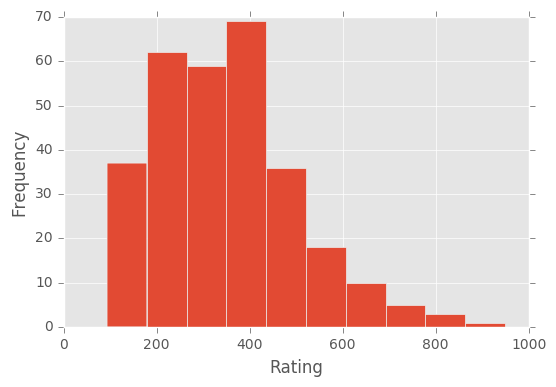

In [21]:
# Produce a histogram of the credit scores
plt.hist(data["Rating"])
plt.xlabel("Rating")
plt.ylabel("Frequency")

In [22]:
# Compute the correlation between all the numerical variables of the sample
data.corr()

,Income,Rating,Cards,Age,Education,Balance
Income,1.000000,0.771167,0.028875,0.123201,-0.070959,0.432327
Rating,0.771167,1.000000,0.095854,0.042377,-0.095433,0.859829
Cards,0.028875,0.095854,1.000000,0.054655,0.015176,0.123846
Age,0.123201,0.042377,0.054655,1.000000,-0.046178,-0.052426
Education,-0.070959,-0.095433,0.015176,-0.046178,1.000000,-0.073167
Balance,0.432327,0.859829,0.123846,-0.052426,-0.073167,1.000000


# Model fitting using Ordinary Least Squares

In [23]:
# We will do an OLS (ordinary least squares) fit of the data in our pandas
# DataFrame using the statsmodels library.
# http://statsmodels.sourceforge.net/devel/example_formulas.html

# statsmodels has us specify formulas using the R formula synatx, which is
#   response variable ~ explanatory variables
linear_model_formula = "Rating ~ Income + Cards + Age + Education + Balance + C(Gender) + C(Student) + C(Married) + C(Ethnicity)"

# Create an ordinary least squares model using that formula and our data.
# The type of the result in statsmodels.regression.linear_model.OLS, see
# additional documentation at:
# http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html
linear_model = smf.ols(formula=linear_model_formula, data=data)
print(type(linear_model))

# Perform a full fit of the model, and get the result. The type of the result
# is statsmodels.regression.linear_model.RegressionResults, which has more
# documentation at:
# http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.RegressionResults.html
linear_model_fit = linear_model.fit()
print(type(linear_model_fit))

<class 'statsmodels.regression.linear_model.OLS'>
<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


Documentation:
 * [statsmodels introduction](http://statsmodels.sourceforge.net/devel/example_formulas.html)
 * [statsmodels.regression.linear_model.OLS](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html)
 * [statsmodels.regression.linear_model.RegressionResults](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.RegressionResults.html)

In [26]:
# Get a quick summary of the Linear model we had fit to the data
linear_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1067.
Date:                Mon, 02 Jan 2017   Prob (F-statistic):          1.17e-221
Time:                        16:25:11   Log-Likelihood:                -1384.7
No. Observations:                 300   AIC:                             2791.
Df Residuals:                     289   BIC:                             2832.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                   142.6518      9.636     14.805      0.000       123.687   161.617
C(Gender)[T.Male]            -1.7704      2.918     -0.607      0.544        -7.513     3.973
C(Student)[T.Yes]           -98.8048      4.960    -19.921      0.000      -108.567   -89.043
C(Married)[T.Yes]             3.1769      3.006      1.057      0.291        -2.739     9.092
C(Ethnicity)[T.Asian]        -4.4283      4.007     -1.105      0.270       -12.315     3.458
C(Ethnicity)[T.Caucasian]    -1.2506      3.534     -0.354      0.724        -8.206     5.705
Income                        2.0947      0.048     43.533      0.000         2.000     2.189
Cards                        -0.7629      1.080     -0.706      0.480        -2.888     1.363
Age                           0.1446      0.086      1.684      0.093        -0.024     0.314
Education                     0.1794      0.474      0.379      0.705        -0.753     1.112
Balance                       0.2314      0.004     63.189      0.000         0.224     0.239
==============================================================================
Omnibus:                       42.495   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.375
Skew:                          -0.987   Prob(JB):                     5.73e-13
Kurtosis:                       3.784   Cond. No.                     4.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Compute the predicted ratings.
predicted_rating = linear_model_fit.predict()
print(type(predicted_rating))

<class 'numpy.ndarray'>


In [25]:
# Convert the result to a pandas series.
predicted_rating = pd.Series(predicted_rating, name="PredictedRating")
print(type(predicted_rating))

<class 'pandas.core.series.Series'>


In [26]:
# Compute the correlation between the fitted values and the actual ones
predicted_rating.corr(data["Rating"])

0.9867324157146663

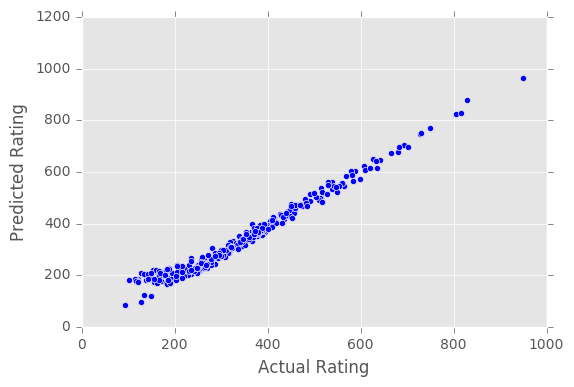

In [27]:
# Plot the actual rating versus predicted rating
plt.scatter(data["Rating"], predicted_rating)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")

# Another OLS model fitting

In [35]:
new_linear_model_formula = "Rating ~ Income + Cards + C(Married)"
new_linear_model = smf.ols(formula=new_linear_model_formula, data=data)
new_linear_model_fit = new_linear_model.fit()

new_predicted_rating = new_linear_model_fit.predict()
new_predicted_rating = pd.Series(new_predicted_rating, name="NewPredictedRating")

In [36]:
# Compute the correlation between the fitted values and the actual ones
new_predicted_rating.corr(data["Rating"]) 

0.77562009780937868

In [37]:
new_linear_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     149.0
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           7.56e-59
Time:                        15:18:59   Log-Likelihood:                -1792.1
No. Observations:                 300   AIC:                             3592.
Df Residuals:                     296   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept           165.2144     16.641      9.928      0.000       132.464   197.964
C(Married)[T.Yes]    11.8404     11.339      1.044      0.297       -10.474    34.155
Income                3.4196      0.164     20.896      0.000         3.098     3.742
Cards                 8.2699      4.099      2.018      0.045         0.203    16.336
==============================================================================
Omnibus:                      133.940   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.170
Skew:                           0.044   Prob(JB):                     0.000187
Kurtosis:                       1.831   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

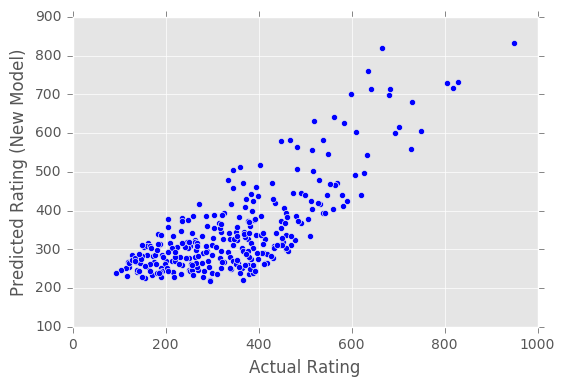

In [30]:
# Plot the actual rating versus predicted rating
plt.scatter(data["Rating"], new_predicted_rating)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating (New Model)")

# Direct Data Visualization

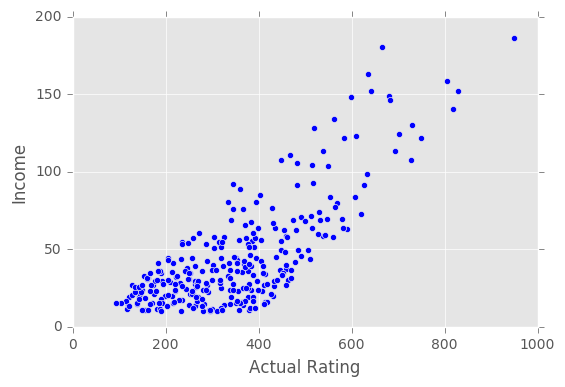

In [32]:
# Visualize the relationship between Income and Rating
plt.scatter(data["Rating"], data["Income"])
plt.xlabel("Actual Rating")
plt.ylabel("Income")

Note that this is just a scaled version of the predicted-versus-actual graph. This makes sense, because the only feature that was used in the predicted-versus-actual was income, and the linear regression just scaled that.

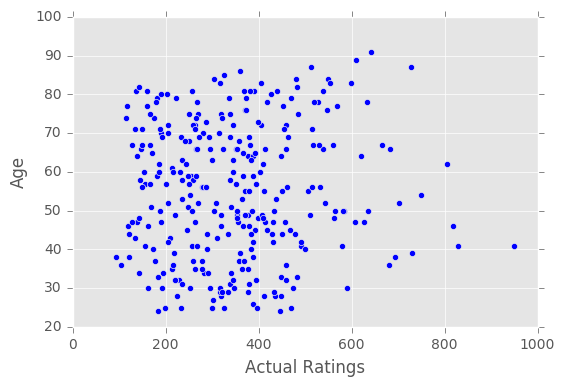

In [33]:
# Visualize the relationship between Balance and Rating
plt.scatter(data["Rating"], data["Age"])
plt.xlabel("Actual Ratings")
plt.ylabel("Age")

Note that this is mostly noise, which is consistent with Age having a low p-value.